In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [10]:
function  = '01101001001'

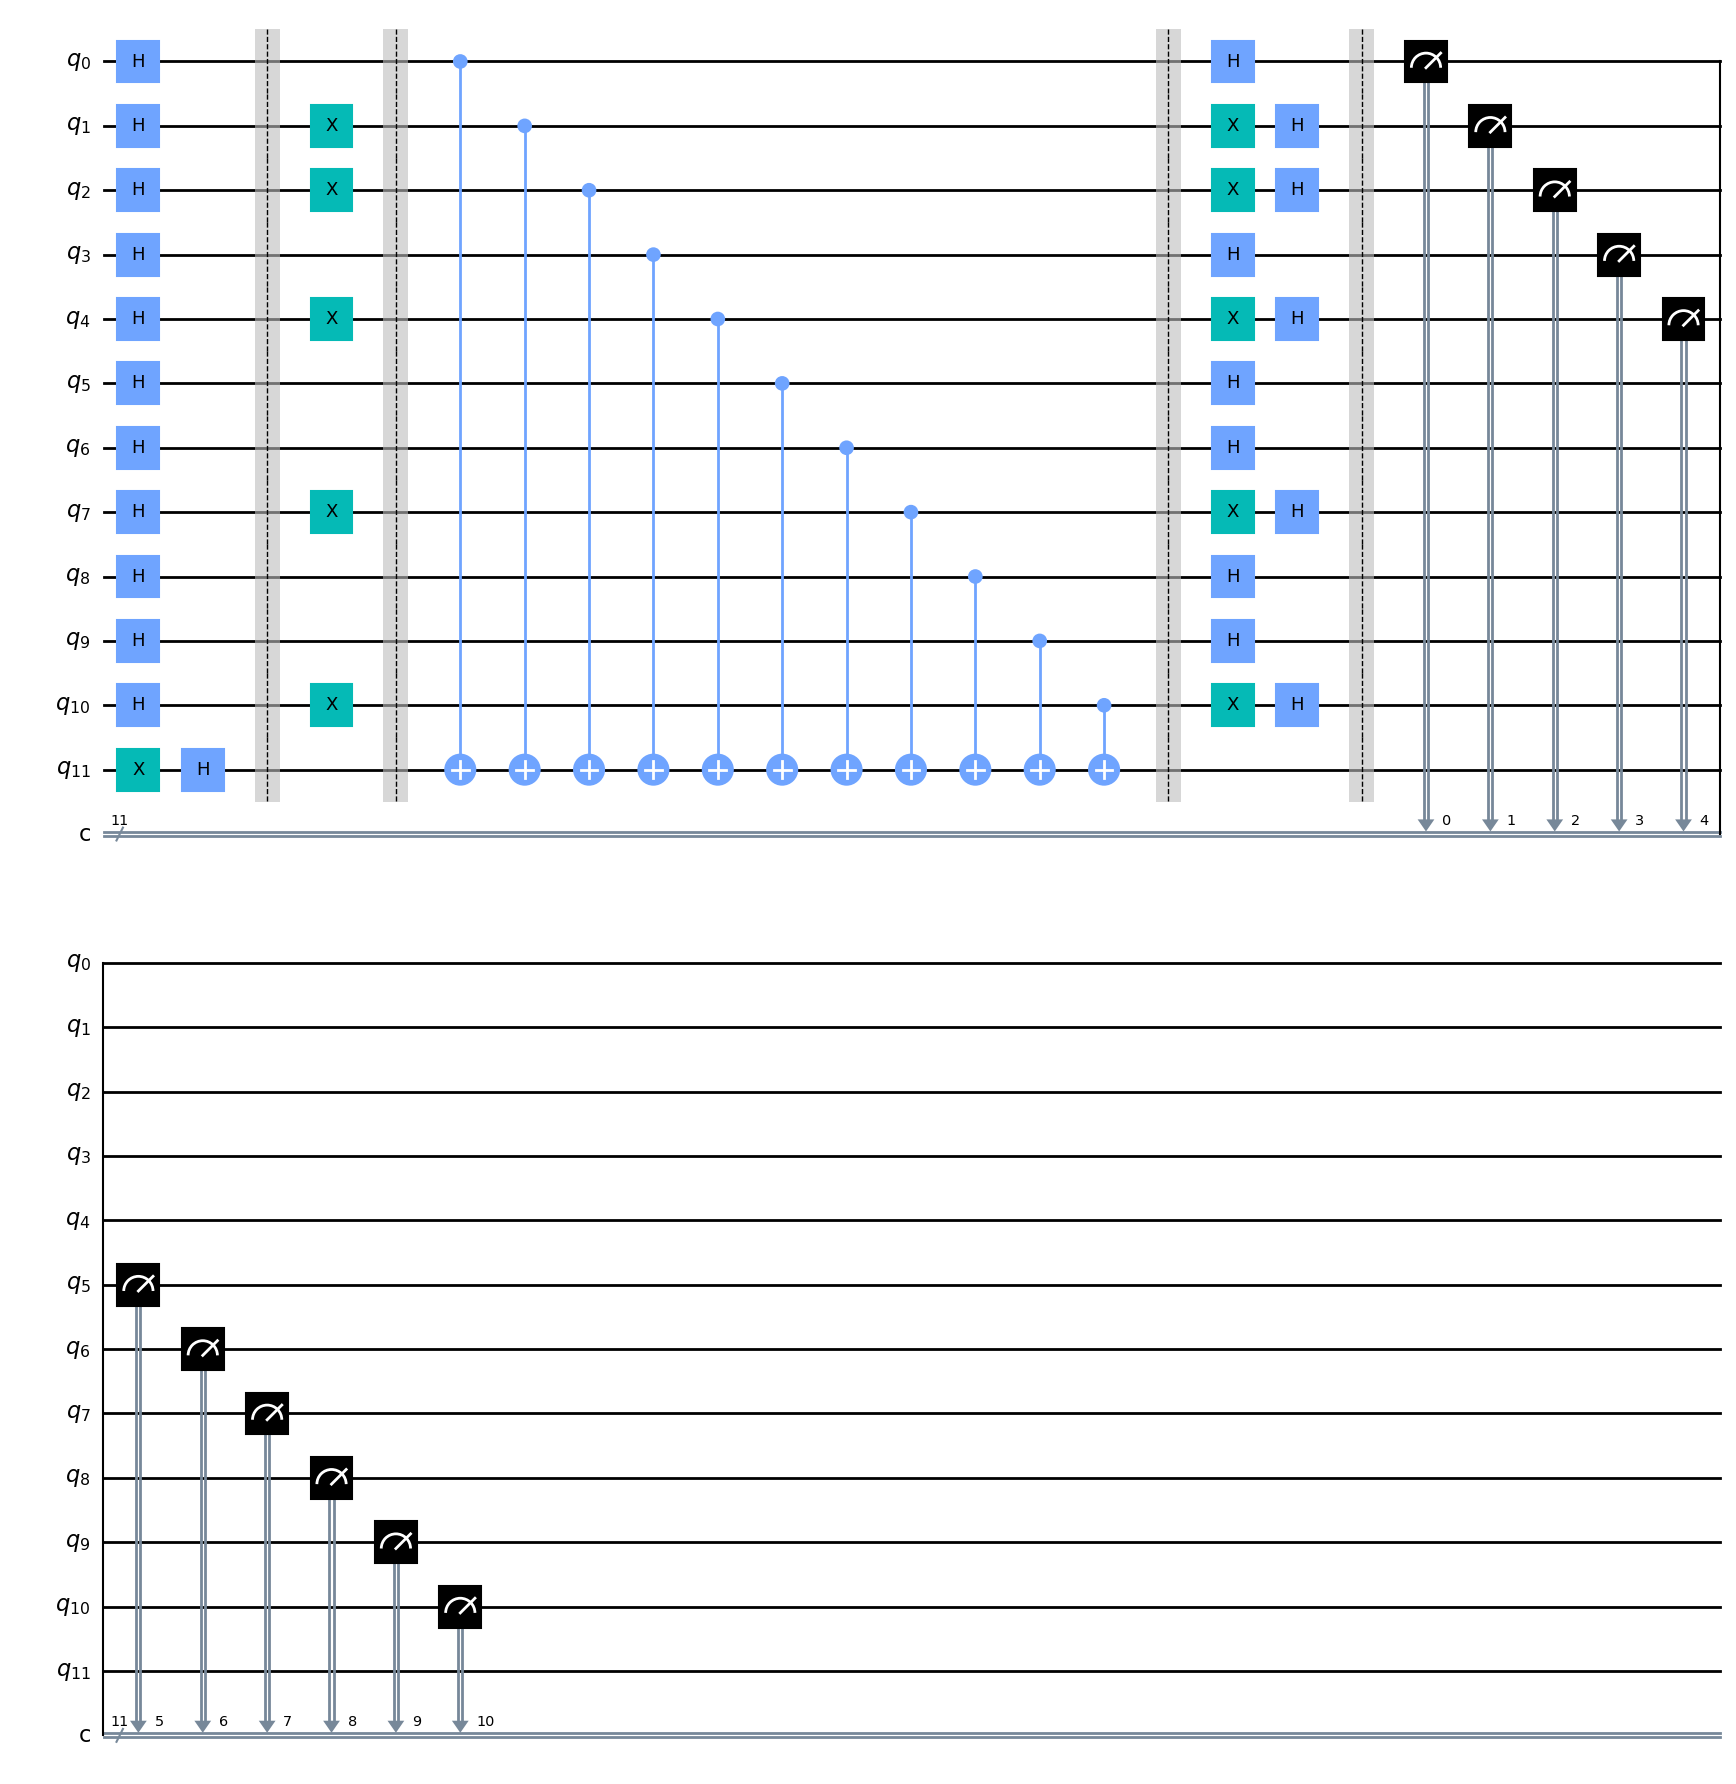

In [11]:
circuit = QuantumCircuit(len(function)+1,len(function))
circuit.h(range(len(function)))
circuit.x(len(function))
circuit.h(len(function))

circuit.barrier()
for i, yesno in enumerate(function):
    if yesno == '1':
        circuit.x(i)

circuit.barrier()
for i in range(len(function)):
    circuit.cx(i,len(function))

circuit.barrier()
for i, yesno in enumerate(function):
    if yesno == '1':
        circuit.x(i)

circuit.h(range(len(function)))

circuit.barrier()
circuit.measure(range(len(function)),range(len(function)))

circuit.draw(output='mpl')

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator,shots=1).result()
counts = result.get_counts()
print(counts)

{'11111111111': 1}
